In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array


In [2]:
import pytesseract
from pytesseract import Output
import easyocr


/Users/naufalbasara/anaconda3/envs/tf/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/naufalbasara/anaconda3/envs/tf/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <F0D48035-EF9E-3141-9F63-566920E60D7C> /Users/naufalbasara/anaconda3/envs/tf/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <7422C53A-9F13-3592-9338-E2EA7D46A90F> /Users/naufalbasara/anaconda3/envs/tf/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


### Data Preprocessing

In [3]:
image_path = './../dataset/DollarGlen.jpg'

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


([[53, 105], [223, 105], [223, 145], [53, 145]], 'DOLLAR', 0.9999574161811404)
([[237, 107], [349, 107], [349, 143], [237, 143]], 'GLEN', 0.6757320022266718)
([[166, 152], [240, 152], [240, 182], [166, 182]], 'AND', 0.9999827936409793)
([[35, 187], [175, 187], [175, 225], [35, 225]], 'CASTLE', 0.9744875493568529)
([[186, 185], [369, 185], [369, 225], [186, 225]], 'CAMPBELL', 0.9543176812195442)


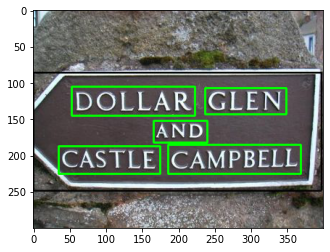

In [4]:
def get_bboxes(image_path):

    img = cv2.imread(image_path)

    reader = easyocr.Reader(['en'])
    txt = reader.readtext(img)
    box_coord = []

    for t in txt:
        print(t)

        bbox, text, score = t
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255,0), 2)
        box_coord.append((bbox[0], bbox[2]))

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    return box_coord

box_coord=get_bboxes(image_path)

In [5]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('model_93.h5')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 29, 29, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 average_pooling2d_2 (Averag  (None, 5, 5, 32)         0

In [6]:
classes_obj = {
    0: 0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:"A", 11:"B", 12:"C", 13:"D", 14:"E", 15:"F", 16:"G", 17:"H",
    18:"I", 19:"J", 20:"K", 21:"L", 22:"M", 23:"N", 24:"O", 25:"P", 26:"Q", 27:"R", 28:"S", 29:"T", 30:"U", 31:"V", 32:"W",
    33:"X", 34:"Y", 35:"Z", 36:"a", 37:"b", 38:"c", 39:"d", 40:"e", 41:"f", 42:"g", 43:"h",
    44:"i", 45:"j", 46:"k", 47:"l", 48:"m", 49:"n", 50:"o", 51:"p", 52:"q", 53:"r", 54:"s", 55:"t", 56:"u", 57:"v", 58:"w",
    59:"x", 60:"y", 61:"z"
}


### OpenCV

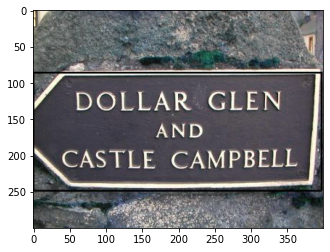

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


([[53, 105], [223, 105], [223, 145], [53, 145]], 'DOLLAR', 0.9999574161811404)
([[237, 107], [349, 107], [349, 143], [237, 143]], 'GLEN', 0.6757320022266718)
([[166, 152], [240, 152], [240, 182], [166, 182]], 'AND', 0.9999827936409793)
([[35, 187], [175, 187], [175, 225], [35, 225]], 'CASTLE', 0.9744875493568529)
([[186, 185], [369, 185], [369, 225], [186, 225]], 'CAMPBELL', 0.9543176812195442)


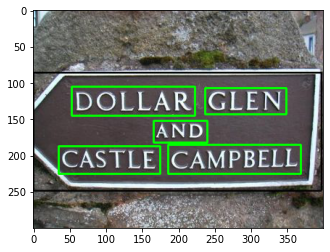

In [7]:
image_path = './../dataset/DollarGlen.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()

def get_bboxes(image_path):

    img = cv2.imread(image_path)

    reader = easyocr.Reader(['en'])
    txt = reader.readtext(img)
    box_coord = []

    for t in txt:
        print(t)

        bbox, text, score = t
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255,0), 2)
        box_coord.append((bbox[0], bbox[2]))

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    return box_coord

box_coord=get_bboxes(image_path)

1/1 [==============================] - 0s 10ms/step


2023-06-11 13:31:59.409687: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 10ms/step


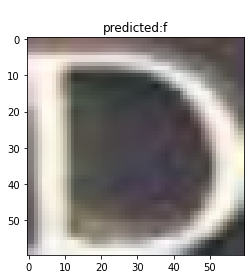

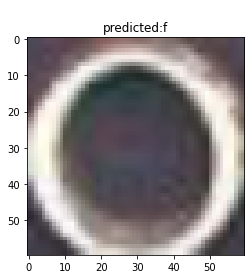

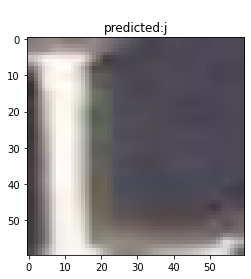

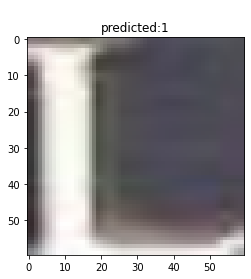

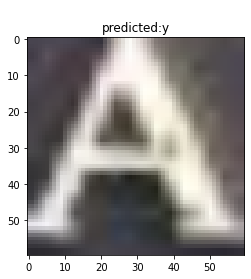

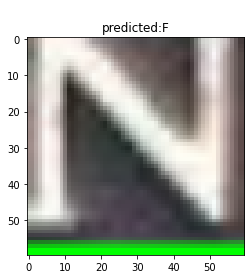

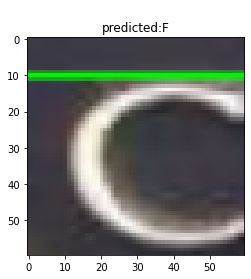

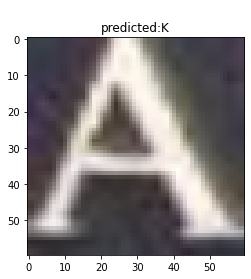

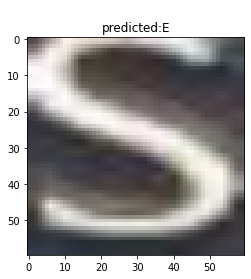

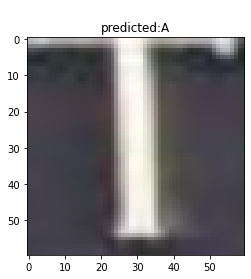

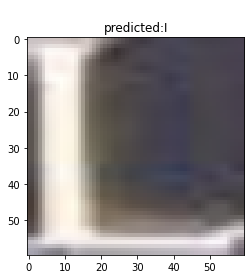

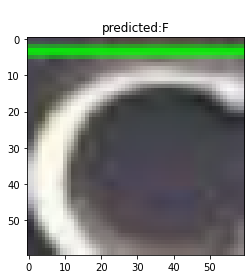

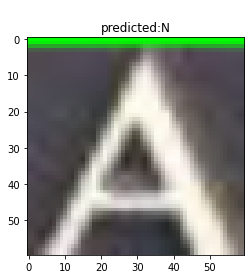

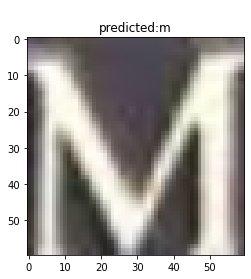

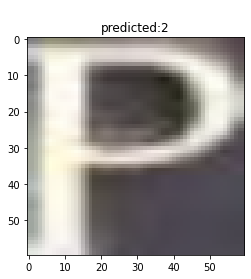

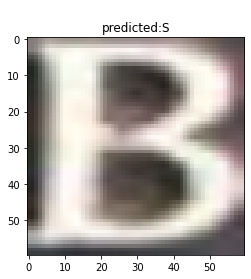

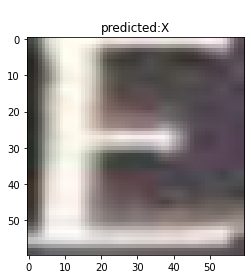

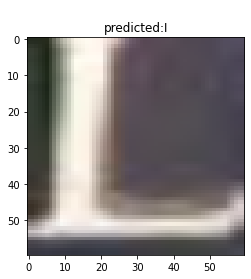

In [8]:
IMAGE_PATH = './../dataset/DollarGlen.jpg'
img = cv2.imread(IMAGE_PATH)
results = []

# Iterate every word
for box in box_coord:
        min_coord, max_coord = box
        xmin, ymin = min_coord
        xmax, ymax = max_coord
        crop_img = img[ymin:ymax, xmin:xmax]
        himg, wimg, _ = crop_img.shape

        tes_box = pytesseract.image_to_boxes(crop_img)
        # Iterate every character
        for bx in tes_box.splitlines():
            bx = bx.split()
            x, y, w, h = int(bx[1]), int(bx[2]), int(bx[3]), int(bx[4])
            
            cv2.rectangle(crop_img, (x-1,himg-y+2), (w+1, himg-h-2), (0,255,0), 1)
            crop_char = crop_img[y:h, x:w]
            
            crop_char = cv2.resize(crop_char, (60,60))
            x = img_to_array(crop_char)
            x = np.expand_dims(x, axis=0)

            images = np.vstack([x])
            classes = model.predict(images, batch_size=10)
            plt.figure()
            plt.imshow(crop_char)
            plt.title(f'\npredicted:{classes_obj.get(np.argmax(classes))}')
        plt.close()


### Load Model

1/1 [==============================] - 0s 9ms/step

predicted:a


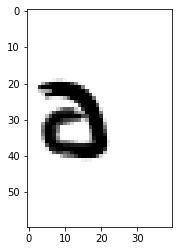

In [9]:
test_image = './../dataset/alphanumeric/a_L/A_L_1000.png'
img = cv2.imread(test_image)
plt.imshow(img)
 
# predicting images
img = load_img(test_image, target_size=(60, 60))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(f'\npredicted:{classes_obj.get(np.argmax(classes))}')